# [2] Algorithms: Basic Sorting Algorithms

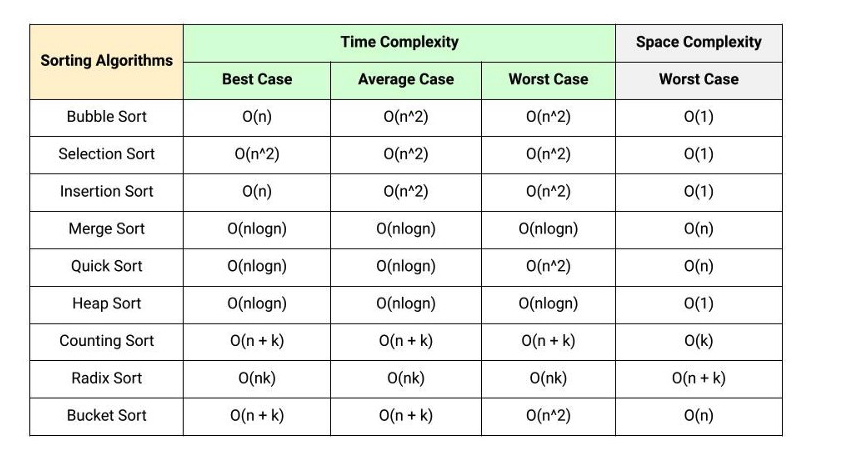

## Bubble Sort

**NAIVE** bubble sort algorithm with O(n^2):  
    two neighboring items are compared, item with higher value will be 
    swapped to the right, item with lower value to the left, item with
    highest value bubbles to the end of the list. Items, which were already placed to 
    the end of the list, are ignored in the inner loop.

In [1]:
def bubble_sort_unoptimized(items):
    global num_iterations
    for i in range(n:= len(items)):
        for j in range(n-1-i):
            if items[j] > items[j+1]:
                items[j], items[j+1] = items[j+1], items[j]
            num_iterations += 1
    return items

**Optimized** basic bubble sort algorithm with O(n^2)
    (n - 1) + (n - 2) + (n - 3) + … + 2 + 1 = n(n-1)/2 comparisons, 
    which can also be written as ½n2 - ½n => O(n^2)
    additional flag sorted is set and algorithm is terminated if no
    sorting was necessary for the whole inner for-loop.
    -> realpython


In [64]:
def bubble_sort_optimized(items):
    global num_iterations
    for i in range(n:= len(items)):
        already_sorted = True            # <-- change
        for j in range(n-1-i):
            if items[j] > items[j+1]:
                items[j], items[j+1] = items[j+1], items[j]
                already_sorted = False   # <-- change
            num_iterations += 1
        if already_sorted: break         # <-- change
    return items

## Selection Sort

 **Basic** implementation of selection sort.
    The item with the lowest value is searched and
    swapped with first unsorted item in the list  
    Time complexity: O(n^2)

In [3]:
def selection_sort(items):
    global num_iterations
    for i in range(n:=len(items)):
        min = i
        for j in range(i+1, n):
            # swap smallest element to beginning of unsorted list
            if items[j] < items[min]:
                min = j
            num_iterations += 1
        items[i], items[min] = items[min], items[i]
    return items


**Min-Max implementation** of selection sort.
    The item with the lowest value is searched and
    swapped with first unsorted item in the list, the
    maximum item is swapped to the end of the list, 
    both in the same outer loop

In [12]:
def selection_sort_minmax(items):
    global num_iterations
    n = len(items)
    for i in range(-(-n//2)):  # -(-n//2): aufrunden
        min = i
        max = i
        for j in range(i+1, n-i):
            if (items[j] < items[min]):
                min = j
            elif (items[j] > items[max]):
                max = j
            num_iterations += 1
        # swapping the min
        items[i], items[min] = items[min], items[i]
        # swapping the min
        if max == i: max = min
        items[n-1-i], items[max] = items[max], items[n-1-i]
    return items


 
 
 
 
 **the two smallest** list items are searched and swapped 
    to the beginning of the unsorted list (TGI01)

In [18]:
def selection_sort_min2(items):
    global num_iterations
    n = len(items)
    
    for i in range(0,n-1,2):
        # smallest item is min1, min2 the bigger one
        min1 = i
        min2 = i
        if (items[i] < items[i+1]): min2 = i+1  
        else: min1 = i+1
        # searching the whole unsorted portion of the list
        for j in range(i+1, n):
            num_iterations += 1
            if (items[j] < items[min2]):
                min2 = j
                if (items[j] < items[min1]):
                    min2 = min1
                    min1 = j
        #swapping min1
        items[i], items[min1] = items[min1], items[i]
        # swapping min2
        if(min2 == i): min2 = min1
        items[i+1], items[min2] = items[min2], items[i+1]  
    return items

## Quick Sort
recursive sorting  
Time Complexity: Worst case: O(n^2), Average/ Best: O(n log n),  
Auxiliary Space: O(1)

In [14]:
def quicksort(items):
    global num_iterations
    num_iterations += 1
    if (n:=len(items)) <= 1:
        return items
    pivot = items[n // 2]
    left = [x for x in items if x < pivot]
    middle = [x for x in items if x == pivot]
    right = [x for x in items if x > pivot]
    return quicksort(left) + middle + quicksort(right)

## Insertion Sort
insertion sort **inplace** (TGI01/ real-python)

In [16]:
def insertion_sort(items):
    global num_iterations
    
    for i in range(1, len(items)):
        value = items[i]  # value to be positioned in correct place
        j = i - 1
        # alle Elemente der linken, bereits sortierten Liste nach hinten schieben, 
        # bis richtige Stelle erreicht ist
        num_iterations += 1
        while(j >= 0 and items[j] > value):   # Konditionen werden von links nach rechts durchgegangen
            items[j+1] = items[j]
            j -= 1
            if j >=0: num_iterations += 1
        items[j+1] = value
    return items

In [68]:
sort_functions=[bubble_sort_unoptimized, 
                bubble_sort_optimized, 
                selection_sort, 
                selection_sort_minmax,
                selection_sort_min2,
                quicksort,
                insertion_sort,
]
statistics = {}
for f in sort_functions:
    num_iterations = 0
    item_lst = [13, 4, 11, 0, 9, 3, 6]
    sorted_lst = f(item_lst)
    statistics[f.__name__] = int(num_iterations)
    print(f"{f.__name__} needed {num_iterations} iterations:\t{sorted_lst}")

bubble_sort_unoptimized needed 21 iterations:	[0, 3, 4, 6, 9, 11, 13]
bubble_sort_optimized needed 20 iterations:	[0, 3, 4, 6, 9, 11, 13]
selection_sort needed 21 iterations:	[0, 3, 4, 6, 9, 11, 13]
selection_sort_minmax needed 12 iterations:	[0, 3, 4, 6, 9, 11, 13]
selection_sort_min2 needed 12 iterations:	[0, 3, 4, 6, 9, 11, 13]
quicksort needed 11 iterations:	[0, 3, 4, 6, 9, 11, 13]
insertion_sort needed 18 iterations:	[0, 3, 4, 6, 9, 11, 13]


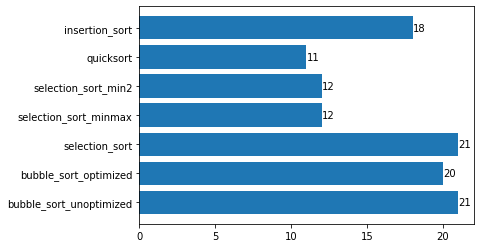

In [69]:
import matplotlib.pyplot as plt

names = list(statistics.keys())
values = list(statistics.values())

bars = plt.barh(names, values)
#plt.bar_label(labels=None, fmt='%g', label_type='center', padding=0)
#plt.axes(
plt.xticks(range(0,25,5))
plt.bar_label(bars, size = 10)
plt.show()

In [59]:
help(plt.text)

Help on function text in module matplotlib.pyplot:

text(x, y, s, fontdict=None, **kwargs)
    Add text to the Axes.
    
    Add the text *s* to the Axes at location *x*, *y* in data coordinates.
    
    Parameters
    ----------
    x, y : float
        The position to place the text. By default, this is in data
        coordinates. The coordinate system can be changed using the
        *transform* parameter.
    
    s : str
        The text.
    
    fontdict : dict, default: None
        A dictionary to override the default text properties. If fontdict
        is None, the defaults are determined by `.rcParams`.
    
    Returns
    -------
    `.Text`
        The created `.Text` instance.
    
    Other Parameters
    ----------------
    **kwargs : `~matplotlib.text.Text` properties.
        Other miscellaneous text parameters.
    
        Properties:
        agg_filter: a filter function, which takes a (m, n, 3) float array and a dpi value, and returns a (m, n, 3) array
     